In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import pandas as pd
import requests
import re
import time
import numpy as np
import holidays
from datetime import datetime, timedelta
import time
from scipy.stats import skew, kurtosis
import ast
from polygon import RESTClient
from polygon.rest.models.request import RequestOptionBuilder
api_key = "HsOX1rl8t3B1AJfl4O2uqscUp372l7EF"
ticker = "SPY240802C00530000"
from scipy.stats import kurtosis, skew
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
from requests.exceptions import HTTPError
import yfinance as yf

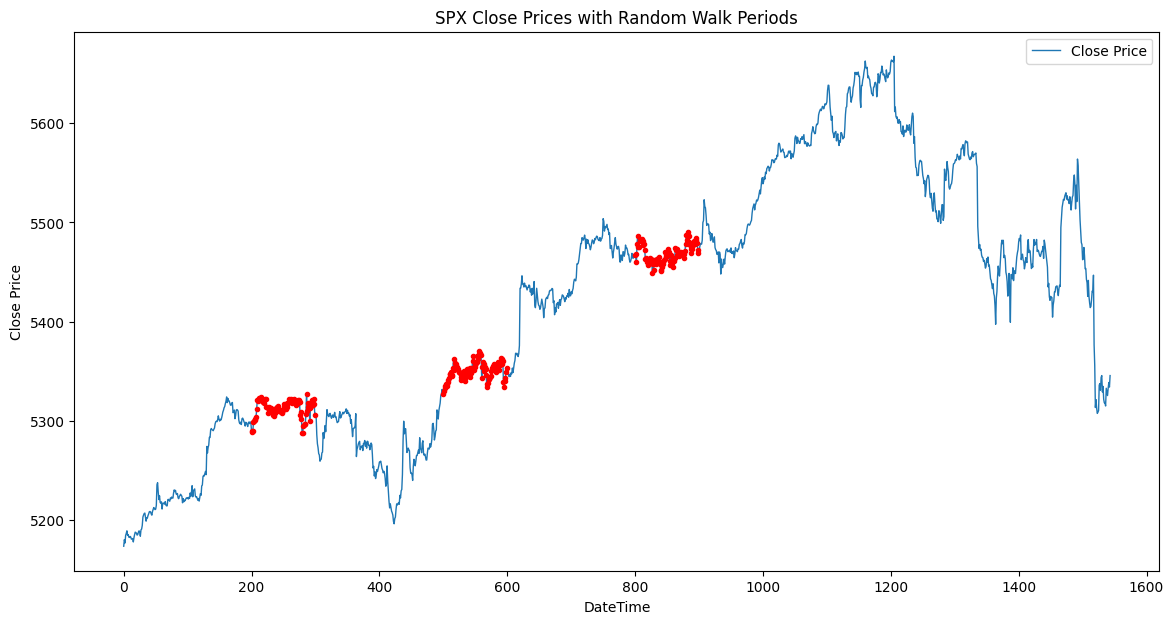

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetching data from Yahoo Finance
spx = yf.Ticker("^GSPC")
df = spx.history(period="60d", interval="15m")
df = df.drop(columns=["Dividends", "Stock Splits"])

# Remove rows where the Close price is NaN
df = df.dropna(subset=['Close'])

# Reset index
df.reset_index(drop=True, inplace=True)

# Parameters
window_size = 100  # Size of the window to test for random walk
std_threshold = 10  # Threshold for standard deviation to consider as random walk
results = []

# Slide the window and test for random walk
for start in range(0, len(df) - window_size + 1, window_size):
    end = start + window_size
    segment = df['Close'][start:end]
    
    if np.std(segment) < std_threshold:
        results.append((start, end, True))
    else:
        results.append((start, end, False))

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', linewidth=1)

# Highlight random walk segments
for start, end, is_random_walk in results:
    if is_random_walk:
        plt.plot(df.index[start:end], df['Close'][start:end], 'r.')

plt.title('SPX Close Prices with Random Walk Periods')
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend()
plt.show()


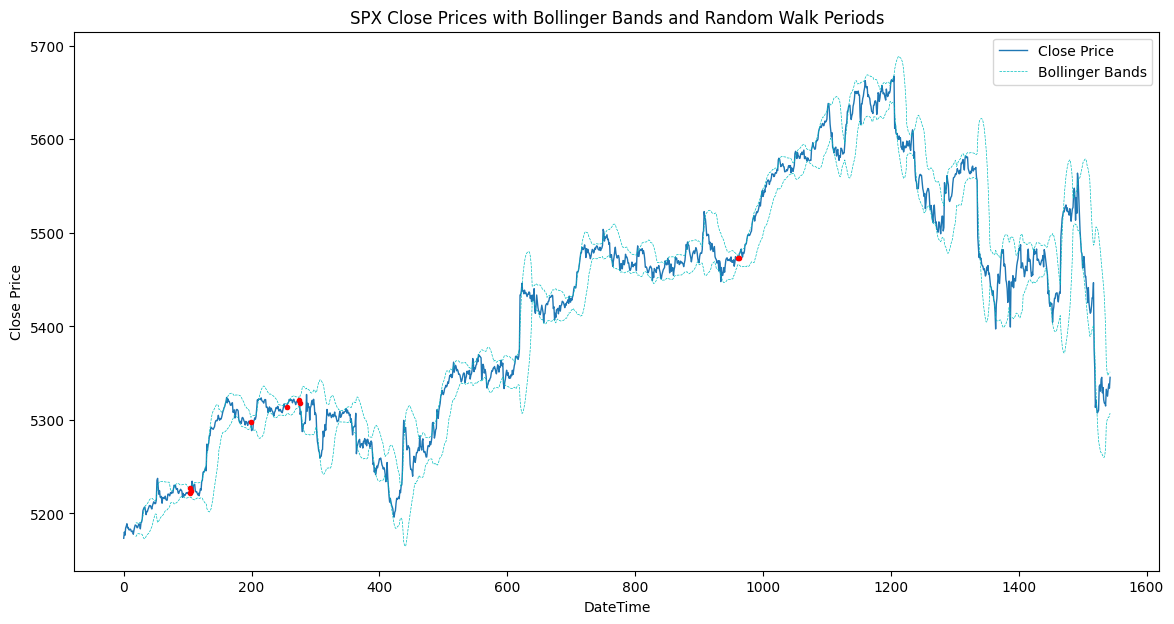

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetching data from Yahoo Finance
spx = yf.Ticker("^GSPC")
df = spx.history(period="60d", interval="15m")
df = df.drop(columns=["Dividends", "Stock Splits"])

# Remove rows where the Close price is NaN
df = df.dropna(subset=['Close'])

# Reset index
df.reset_index(drop=True, inplace=True)

# Calculate Bollinger Bands
window = 20
df['SMA'] = df['Close'].rolling(window=window).mean()
df['STD'] = df['Close'].rolling(window=window).std()
df['Upper Band'] = df['SMA'] + (df['STD'] * 2)
df['Lower Band'] = df['SMA'] - (df['STD'] * 2)

# Identify random walk periods based on Bollinger Band width
threshold = 10
df['Band Width'] = df['Upper Band'] - df['Lower Band']
df['Random Walk'] = df['Band Width'] < threshold

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', linewidth=1)
plt.plot(df.index, df['Upper Band'], 'c--', linewidth=0.5, label='Bollinger Bands')
plt.plot(df.index, df['Lower Band'], 'c--', linewidth=0.5)

# Highlight random walk segments
for i in range(len(df)):
    if df['Random Walk'].iloc[i]:
        plt.plot(df.index[i], df['Close'].iloc[i], 'r.')

plt.title('SPX Close Prices with Bollinger Bands and Random Walk Periods')
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend()
plt.show()



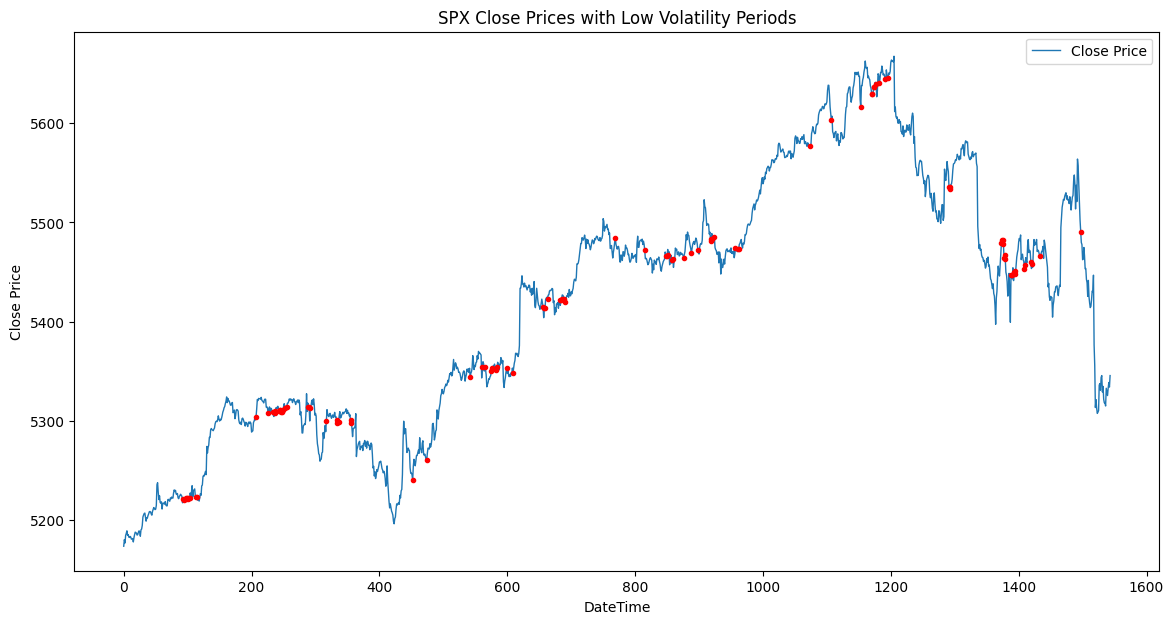

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetching data from Yahoo Finance
spx = yf.Ticker("^GSPC")
df = spx.history(period="60d", interval="15m")
df = df.drop(columns=["Dividends", "Stock Splits"])

# Remove rows where the Close price is NaN
df = df.dropna(subset=['Close'])

# Reset index
df.reset_index(drop=True, inplace=True)

# Parameters
window_size = 50  # Increased window size for smoother detection
zscore_threshold = 0.2  # Higher threshold for Z-Score to reduce sensitivity

# Calculate moving average and standard deviation
df['Rolling Mean'] = df['Close'].rolling(window=window_size).mean()
df['Rolling Std'] = df['Close'].rolling(window=window_size).std()

# Calculate Z-Score
df['Z-Score'] = (df['Close'] - df['Rolling Mean']) / df['Rolling Std']

# Identify low volatility periods
df['Low Volatility'] = df['Z-Score'].abs() < zscore_threshold

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', linewidth=1)

# Highlight low volatility periods
for i in range(len(df)):
    if df['Low Volatility'].iloc[i]:
        plt.plot(df.index[i], df['Close'].iloc[i], 'r.')

plt.title('SPX Close Prices with Low Volatility Periods')
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [5]:
df

,Open,High,Low,Close,Volume,Rolling Mean,Rolling Std,Z-Score,Low Volatility
0,5168.979980,5173.910156,5165.859863,5173.459961,64738552,NaN,NaN,NaN,False
1,5173.330078,5180.069824,5173.049805,5180.069824,91067390,NaN,NaN,NaN,False
2,5180.180176,5181.729980,5175.560059,5176.720215,90125865,NaN,NaN,NaN,False
3,5176.810059,5185.620117,5176.620117,5184.319824,73054856,NaN,NaN,NaN,False
4,5184.229980,5186.970215,5182.379883,5186.370117,63229260,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
1539,5328.600098,5334.669922,5324.930176,5325.390137,78222000,5406.602588,78.316433,-1.036978,False
1540,5325.180176,5333.299805,5322.660156,5332.879883,85248000,5402.510986,76.667057,-0.908227,False
1541,5332.899902,5340.790039,5327.649902,5338.549805,102210000,5398.862979,75.242714,-0.801582,False
1542,5338.729980,5343.939941,5323.330078,5333.919922,147657000,5394.263975,71.904775,-0.839222,False


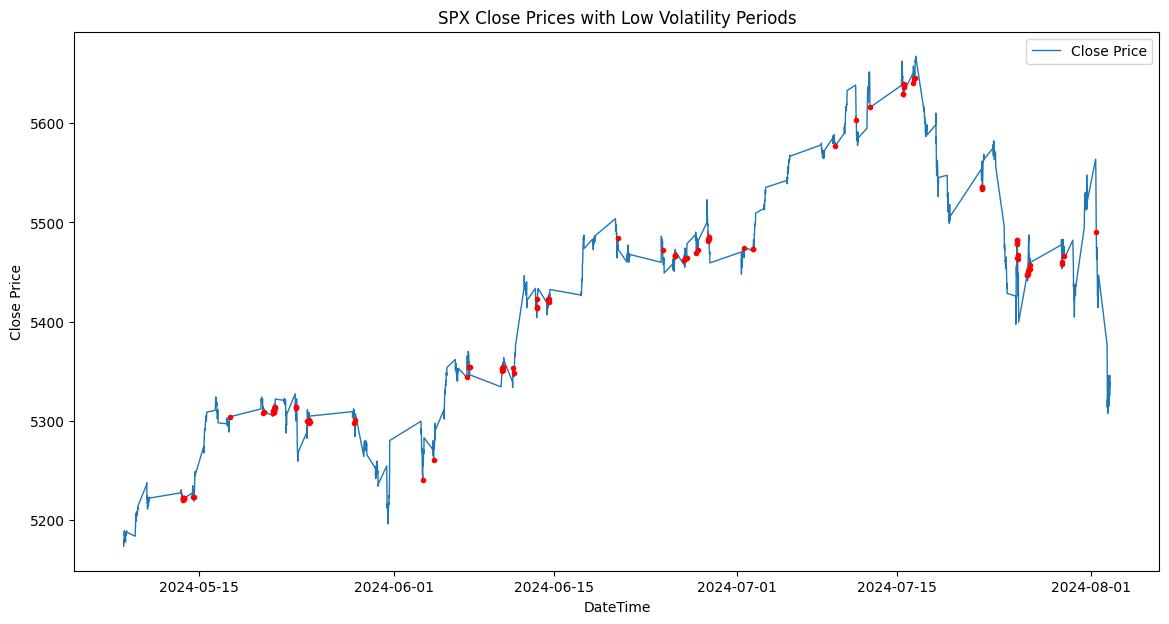

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetching data from Yahoo Finance
spx = yf.Ticker("^GSPC")
df = spx.history(period="60d", interval="15m")
df = df.drop(columns=["Dividends", "Stock Splits"])

# Remove rows where the Close price is NaN
df = df.dropna(subset=['Close'])

# Reset index
df.reset_index(inplace=True)

# Parameters
window_size = 50  # Increased window size for smoother detection
zscore_threshold = 0.2  # Higher threshold for Z-Score to reduce sensitivity

# Calculate moving average and standard deviation
df['Rolling Mean'] = df['Close'].rolling(window=window_size).mean()
df['Rolling Std'] = df['Close'].rolling(window=window_size).std()

# Calculate Z-Score
df['Z-Score'] = (df['Close'] - df['Rolling Mean']) / df['Rolling Std']

# Identify low volatility periods
df['Low Volatility'] = df['Z-Score'].abs() < zscore_threshold

# Create a DataFrame for the entry points
entry_points = df[df['Low Volatility']][['Datetime', 'Close']]
entry_points.columns = ['DateTime', 'Entry Price']

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df['Datetime'], df['Close'], label='Close Price', linewidth=1)

# Highlight low volatility periods
for i in range(len(df)):
    if df['Low Volatility'].iloc[i]:
        plt.plot(df['Datetime'].iloc[i], df['Close'].iloc[i], 'r.')

plt.title('SPX Close Prices with Low Volatility Periods')
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend()
plt.show()

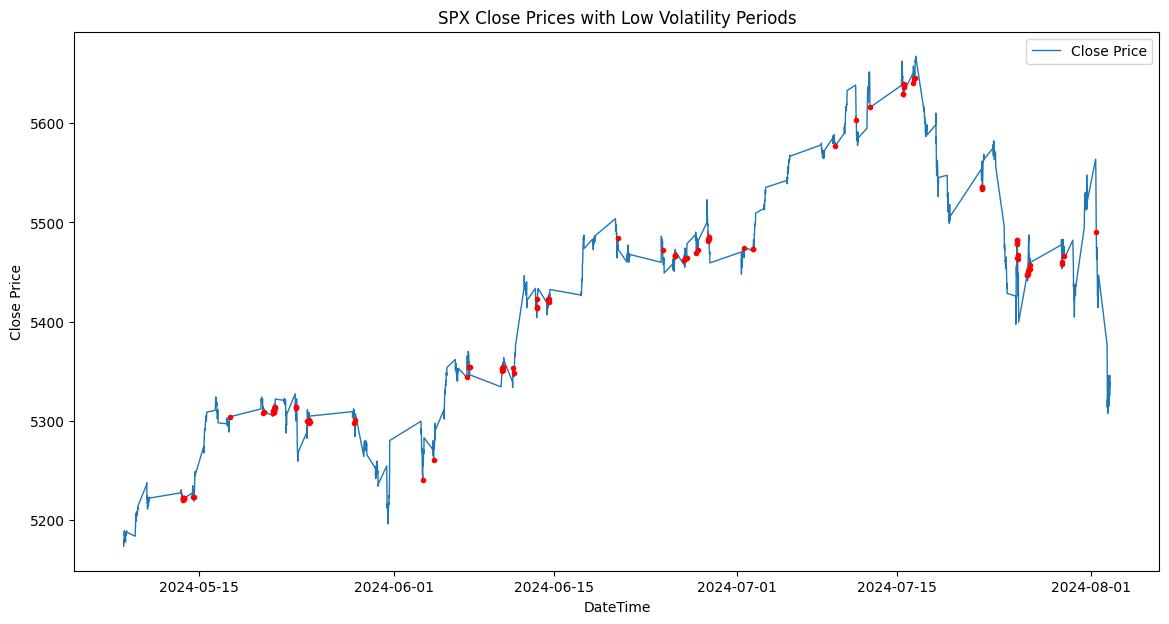

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetching data from Yahoo Finance
spx = yf.Ticker("^GSPC")
df = spx.history(period="60d", interval="15m")
df = df.drop(columns=["Dividends", "Stock Splits"])

# Remove rows where the Close price is NaN
df = df.dropna(subset=['Close'])

# Reset index
df.reset_index(inplace=True)

# Parameters
window_size = 50  # Increased window size for smoother detection
zscore_threshold = 0.2  # Higher threshold for Z-Score to reduce sensitivity

# Calculate moving average and standard deviation
df['Rolling Mean'] = df['Close'].rolling(window=window_size).mean()
df['Rolling Std'] = df['Close'].rolling(window=window_size).std()

# Calculate Z-Score
df['Z-Score'] = (df['Close'] - df['Rolling Mean']) / df['Rolling Std']

# Identify low volatility periods
df['Low Volatility'] = df['Z-Score'].abs() < zscore_threshold

# Create a DataFrame for the entry points
entry_points = df[df['Low Volatility']][['Datetime', 'Close']]
entry_points.columns = ['DateTime', 'Entry Price']

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df['Datetime'], df['Close'], label='Close Price', linewidth=1)

# Highlight low volatility periods
for i in range(len(df)):
    if df['Low Volatility'].iloc[i]:
        plt.plot(df['Datetime'].iloc[i], df['Close'].iloc[i], 'r.')

plt.title('SPX Close Prices with Low Volatility Periods')
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [6]:
entry_points


,DateTime,Entry Price
93,2024-05-13 13:15:00-04:00,5221.459961
95,2024-05-13 13:45:00-04:00,5219.899902
97,2024-05-13 14:15:00-04:00,5220.979980
98,2024-05-13 14:30:00-04:00,5222.180176
99,2024-05-13 14:45:00-04:00,5221.870117
...,...,...
1410,2024-07-26 15:00:00-04:00,5456.720215
1419,2024-07-29 10:45:00-04:00,5460.479980
1421,2024-07-29 11:15:00-04:00,5457.750000
1434,2024-07-29 14:30:00-04:00,5465.620117


In [ ]:
spx = yf.Ticker("^GSPC")
df = spx.history(period="60d", interval="15m")
df = df.drop(columns=["Dividends", "Stock Splits"])
# Remove rows where the Close price is NaN
df = df.dropna(subset=['Close'])

df.reset_index(drop=True, inplace=True)
df

In [ ]:
window = 20  # 20 periods
df['Rolling Mean'] = df['Close'].rolling(window=window).mean()
df['Rolling Std'] = df['Close'].rolling(window=window).std()

# Define thresholds
volatility_threshold = df['Rolling Std'].mean() * 0.5  # Example threshold for low volatility

# Identify periods of low volatility
df['Low Volatility'] = df['Rolling Std'] < volatility_threshold

# Define a range around the rolling mean
range_threshold = df['Rolling Mean'] * 0.01  # 1% range around the rolling mean

# Identify periods when the price is within the range
df['In Range'] = ((df['Close'] > df['Rolling Mean'] - range_threshold) &
                  (df['Close'] < df['Rolling Mean'] + range_threshold))

# Combine both conditions to identify random walk
df['Random Walk'] = df['Low Volatility'] & df['In Range']

# Display the data with the new indicator
print(df[['Close', 'Rolling Mean', 'Rolling Std', 'Low Volatility', 'In Range', 'Random Walk']])

# Filter and display only the periods identified as random walk
#random_walk_periods = df[df['Random Walk']]

In [ ]:
df

In [ ]:
# Filter the first 100 rows
df_first_100 = df.head(1000)

# Plot the Close prices and Random Walk indicator for the first 100 rows
plt.figure(figsize=(14, 7))

# Plot Close prices
plt.plot(df_first_100.index, df_first_100['Close'], label='Close Price')

# Highlight Random Walk periods
random_walk_periods_first_100 = df_first_100[df_first_100['Random Walk']]
plt.scatter(random_walk_periods_first_100.index, random_walk_periods_first_100['Close'], color='red', label='Random Walk Periods')

# Formatting the plot
plt.title('SPX Close Prices with Random Walk Periods (First 100 Rows)')
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
!pip install tsa